### **ESTRATEGIAS DE MUESTREO EN MODELOS DE CLASIFICACION DESBALANCEADOS**


### **1.Instalación de Librerias**



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

## Libreria para splitear o dividir en train y test
import sklearn.model_selection as model_selection

## Librerias de Machine
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### **2.Importación del caso de negocio**

In [ ]:
df = pd.read_csv('Clasificacion_picos_intensidad.csv')

### **3. Exploracion de datos**

In [ ]:
df.shape

(14375, 9)

In [ ]:
df.head()

,Unnamed: 0,Presion,Tonelaje,Velocidad,%Solidos,Potencia,F80,Brazo,picos_intens
0,316,6144.83,3323.11,8.83,74.20,10869.21,67.60,2.01,0.0
1,317,6143.40,3293.34,8.83,74.47,10867.19,67.42,1.99,0.0
2,318,6139.66,3331.12,8.83,74.50,10795.39,67.46,2.00,0.0
3,319,6138.42,3289.88,8.84,74.50,10801.26,67.08,2.01,0.0
4,320,6135.47,3286.99,8.84,74.26,10883.07,66.57,2.01,0.0


In [ ]:
df.describe()

,Unnamed: 0,Presion,Tonelaje,Velocidad,%Solidos,Potencia,F80,Brazo,picos_intens
count,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000
mean,8112.488348,6015.786763,3363.326903,8.839000,75.487416,11667.772478,64.747783,2.186024,0.104835
std,4274.733801,134.324754,537.442267,0.536565,7.061388,1569.146488,13.439820,0.226976,0.306351
min,316.000000,5566.500000,0.050000,0.010000,0.000000,-23.010000,7.640000,-0.820000,0.000000
25%,4463.500000,5946.590000,3092.900000,8.720000,74.330000,10713.705000,55.095000,2.020000,0.000000
50%,8168.000000,6032.640000,3357.810000,8.870000,75.980000,11353.280000,66.530000,2.160000,0.000000
75%,11818.500000,6104.040000,3662.140000,8.940000,77.850000,12634.270000,76.280000,2.370000,0.000000
max,15419.000000,6483.500000,4547.040000,9.340000,84.830000,15750.450000,91.370000,2.750000,1.000000


In [ ]:
# distribución de itnesisdad de picos
df['picos_intens'].value_counts()

,count
picos_intens,
0.0,12868
1.0,1507


In [ ]:
# distribución de itnesisdad de picos
df['picos_intens'].value_counts(1)

,proportion
picos_intens,
0.0,0.895165
1.0,0.104835


### **4. Separando una muestra para verificar resultado de estrategias de muestreo**

In [ ]:
df.columns

Index(['Unnamed: 0', 'Presion', 'Tonelaje', 'Velocidad', '%Solidos',
       'Potencia', 'F80', 'Brazo', 'picos_intens'],
      dtype='object')

In [ ]:
# Separación de datos en train y test:
X = df[['Presion', 'Tonelaje', 'Velocidad', '%Solidos','Potencia', 'F80', 'Brazo']]
y = df[['picos_intens']]

In [ ]:
# resolver la división de train y test
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,train_size=0.70,random_state=123)

### **5. Estrategias de Muestreo Oversampling y Under Sampling**


In [ ]:
X_train.head()

,Presion,Tonelaje,Velocidad,%Solidos,Potencia,F80,Brazo
3851,6140.41,2819.74,9.33,71.12,14956.34,79.34,2.60
9914,6136.52,3195.79,8.75,75.42,10732.09,81.00,2.01
7668,5943.64,3748.93,9.23,75.17,12846.53,79.15,2.34
12541,5784.15,4121.32,8.68,77.78,10379.79,42.87,2.06
7733,6156.64,3644.13,8.72,74.53,10583.78,61.76,1.98


In [ ]:
y_train.head(2)

,picos_intens
3851,0.0
9914,0.0


In [ ]:
# Unir datos de x_train y t_train
df_train = pd.concat([X_train,y_train],axis=1)

In [ ]:
df_train.head()

,Presion,Tonelaje,Velocidad,%Solidos,Potencia,F80,Brazo,picos_intens
3851,6140.41,2819.74,9.33,71.12,14956.34,79.34,2.60,0.0
9914,6136.52,3195.79,8.75,75.42,10732.09,81.00,2.01,0.0
7668,5943.64,3748.93,9.23,75.17,12846.53,79.15,2.34,0.0
12541,5784.15,4121.32,8.68,77.78,10379.79,42.87,2.06,0.0
7733,6156.64,3644.13,8.72,74.53,10583.78,61.76,1.98,0.0


In [ ]:
# Dividir en dataset de 0 y 1
count_class_0, count_class_1 = df_train.picos_intens.value_counts()
print(count_class_0)
print(count_class_1)

9002
1060


In [ ]:
# Dividir mi conjunto de datos
df_class_0 = df_train[df_train['picos_intens']==0]
df_class_1 = df_train[df_train['picos_intens']==1]

In [ ]:
count_class_0,len(df_class_0), count_class_1, len(df_class_1)

(9002, 9002, 1060, 1060)

**UnderSampling**

In [ ]:
df_class_0.sample(4, random_state=123)

,Presion,Tonelaje,Velocidad,%Solidos,Potencia,F80,Brazo,picos_intens
2176,6058.54,3480.67,9.33,74.91,13843.26,81.50,2.44,0.0
1889,5893.50,2571.58,8.93,70.22,12746.89,72.62,2.42,0.0
5614,5989.36,2534.13,8.58,77.90,11299.76,65.42,2.19,0.0
12379,5792.83,3321.95,9.03,75.02,11468.68,69.47,2.18,0.0


In [ ]:
# generas los registros aleatorios
df_class_0_under=df_class_0.sample(count_class_1,random_state = 123)

# vas a crear un nuevo dataset con los valores unificados
df_train_under = pd.concat([df_class_0_under,df_class_1],axis=0)

In [ ]:
df_train_under['picos_intens'].value_counts()

,count
picos_intens,
0.0,1060
1.0,1060


<Axes: title={'center': 'Cantidad de Target'}, xlabel='picos_intens'>

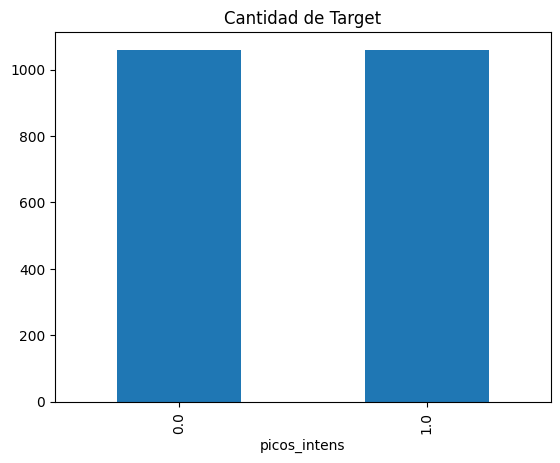

In [ ]:
df_train_under.picos_intens.value_counts().plot(kind='bar',title = 'Cantidad de Target')

**OverSampling**

In [ ]:
df_jb = df_class_0.sample(4, random_state=123)

In [ ]:
df_jb.sample(5, replace = True, random_state = 123)

,Presion,Tonelaje,Velocidad,%Solidos,Potencia,F80,Brazo,picos_intens
5614,5989.36,2534.13,8.58,77.90,11299.76,65.42,2.19,0.0
1889,5893.50,2571.58,8.93,70.22,12746.89,72.62,2.42,0.0
5614,5989.36,2534.13,8.58,77.90,11299.76,65.42,2.19,0.0
5614,5989.36,2534.13,8.58,77.90,11299.76,65.42,2.19,0.0
2176,6058.54,3480.67,9.33,74.91,13843.26,81.50,2.44,0.0


In [ ]:
# generas los registros aleatorios
df_class_1_over=df_class_1.sample(count_class_0,random_state = 123, replace = True)

# vas a crear un nuevo dataset con los valores unificados
df_train_over = pd.concat([df_class_0,df_class_1_over],axis=0)

In [ ]:
df_train_over['picos_intens'].value_counts()

,count
picos_intens,
0.0,9002
1.0,9002


<Axes: title={'center': 'Cantidad de Target'}, xlabel='picos_intens'>

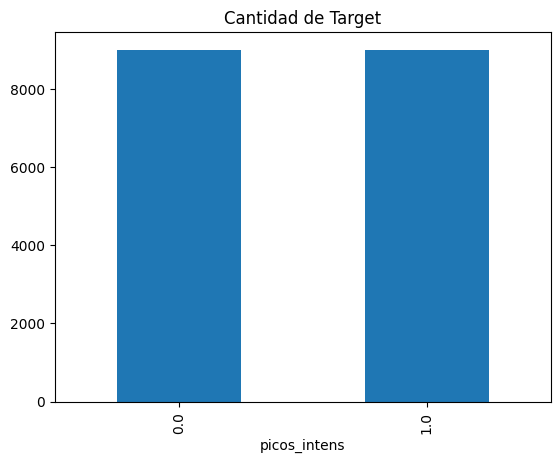

In [ ]:
df_train_over.picos_intens.value_counts().plot(kind='bar',title = 'Cantidad de Target')

### **6.Estrategia de Muestreo SMOTE**

SMOTE (Synthetic Minority Oversampling TEchnique) consiste en sintetizar elementos para la clase minoritaria, basados ​​en los que ya existen. Funciona seleccionando aleatoriamente un punto de la clase minoritaria y calculando los k vecinos más cercanos para este punto. Los puntos sintéticos se agregan entre el punto elegido y sus vecinos o similares.

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
df_train.head()

,Presion,Tonelaje,Velocidad,%Solidos,Potencia,F80,Brazo,picos_intens
3851,6140.41,2819.74,9.33,71.12,14956.34,79.34,2.60,0.0
9914,6136.52,3195.79,8.75,75.42,10732.09,81.00,2.01,0.0
7668,5943.64,3748.93,9.23,75.17,12846.53,79.15,2.34,0.0
12541,5784.15,4121.32,8.68,77.78,10379.79,42.87,2.06,0.0
7733,6156.64,3644.13,8.72,74.53,10583.78,61.76,1.98,0.0


In [ ]:
# Escoge 5 elementos con valor 0 en picos_intens y 3 con valor 1 y los concatena
df_ejemplo = pd.concat([df_train[df_train['picos_intens']==0].head(5),df_train[df_train['picos_intens']==1].head(3)],axis = 0)

In [ ]:
df_ejemplo

,Presion,Tonelaje,Velocidad,%Solidos,Potencia,F80,Brazo,picos_intens
3851,6140.41,2819.74,9.33,71.12,14956.34,79.34,2.60,0.0
9914,6136.52,3195.79,8.75,75.42,10732.09,81.00,2.01,0.0
7668,5943.64,3748.93,9.23,75.17,12846.53,79.15,2.34,0.0
12541,5784.15,4121.32,8.68,77.78,10379.79,42.87,2.06,0.0
7733,6156.64,3644.13,8.72,74.53,10583.78,61.76,1.98,0.0
132,5722.20,0.83,6.01,0.07,5494.98,58.47,1.59,1.0
3951,6106.00,3125.97,8.83,77.09,10848.14,66.52,2.02,1.0
4860,6108.46,3083.45,8.83,74.75,10753.39,55.91,1.99,1.0


In [ ]:
aux_1 = df_ejemplo[['Presion','Tonelaje','Velocidad','%Solidos','Potencia','F80','Brazo']]
aux_2 = df_ejemplo['picos_intens']

In [ ]:
smote = SMOTE(k_neighbors=2,sampling_strategy='minority',random_state=123)

In [ ]:
# acá genera los elementos faltantes, pasando de 3 con valor 1 a 5 con valor 1
X_sm, y_sm =smote.fit_resample(aux_1,aux_2)

In [ ]:
pd.concat([X_sm,y_sm],axis=1)

,Presion,Tonelaje,Velocidad,%Solidos,Potencia,F80,Brazo,picos_intens
0,6140.410000,2819.740000,9.330000,71.120000,14956.340000,79.34000,2.600000,0.0
1,6136.520000,3195.790000,8.750000,75.420000,10732.090000,81.00000,2.010000,0.0
2,5943.640000,3748.930000,9.230000,75.170000,12846.530000,79.15000,2.340000,0.0
3,5784.150000,4121.320000,8.680000,77.780000,10379.790000,42.87000,2.060000,0.0
4,6156.640000,3644.130000,8.720000,74.530000,10583.780000,61.76000,1.980000,0.0
5,5722.200000,0.830000,6.010000,0.070000,5494.980000,58.47000,1.590000,1.0
6,6106.000000,3125.970000,8.830000,77.090000,10848.140000,66.52000,2.020000,1.0
7,6108.460000,3083.450000,8.830000,74.750000,10753.390000,55.91000,1.990000,1.0
8,6020.836358,2384.153172,8.190279,57.808733,9560.512048,56.49074,1.899259,1.0
9,6107.356234,3102.528096,8.830000,75.799923,10795.902926,60.67055,2.003461,1.0


In [ ]:
# Ejecución completa del SMOTE
smote = SMOTE(k_neighbors=5,sampling_strategy='minority',random_state=123)
X_sm, y_sm =smote.fit_resample(X_train,y_train)
df_train_smote = pd.concat([X_sm,y_sm],axis=1)
df_train_smote.picos_intens.value_counts()

,count
picos_intens,
0.0,9002
1.0,9002


### **7.Evaluación de resultados de las estrategias de muestreo**

# Modelo de Clasificación utilizado es el arbol, es posible utilizar otros modelo de clasificación revisar en la parte final


Datos Orignales

In [ ]:
# PASO 1: llamar al modelo
model = DecisionTreeClassifier(random_state = 123)

In [ ]:
# PASO 2: vamos a entrenar el modelo
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=123)

In [ ]:
# PASO 3: predicción del test
y_pred = model.predict(X_test)

In [ ]:
# PASO 4: calculo de Accuracy
accuracy = accuracy_score(y_true = y_test, y_pred = y_pred)
print('Accuracy del modelo con datos originales es de: %.2f%%' % (accuracy*100))

Accuracy del modelo con datos originales es de: 96.38%


In [ ]:
# PASO 5: Calculo de Matriz de confusión
print(10*'-',' Matriz de confusión ',10*'-')
print(confusion_matrix(y_true = y_test, y_pred = y_pred))
print(10*'-',' Metricas del modelo ',10*'-')
print(classification_report(y_true = y_test, y_pred = y_pred))

----------  Matriz de confusión  ----------
[[3786   80]
 [  76  371]]
----------  Metricas del modelo  ----------
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      3866
         1.0       0.82      0.83      0.83       447

    accuracy                           0.96      4313
   macro avg       0.90      0.90      0.90      4313
weighted avg       0.96      0.96      0.96      4313



under

In [ ]:
df_train_under.head(2)

,Presion,Tonelaje,Velocidad,%Solidos,Potencia,F80,Brazo,picos_intens
2176,6058.54,3480.67,9.33,74.91,13843.26,81.50,2.44,0.0
1889,5893.50,2571.58,8.93,70.22,12746.89,72.62,2.42,0.0


In [ ]:
# PASO 0: Adecuación de X_train y y_train
X_train_u = df_train_under[['Presion','Tonelaje','Velocidad','%Solidos','Potencia','F80','Brazo']]
y_train_u =df_train_under[['picos_intens']]

# PASO 1: llamar al modelo
model = DecisionTreeClassifier(random_state = 123)

# PASO 2: vamos a entrenar el modelo
model.fit(X_train_u,y_train_u)

# PASO 3: predicción del test
y_pred = model.predict(X_test)

# PASO 4: calculo de Accuracy
accuracy = accuracy_score(y_true = y_test, y_pred = y_pred)
print('Accuracy del modelo con datos originales es de: %.2f%%' % (accuracy*100))

# PASO 5: Calculo de Matriz de confusión
print(10*'-',' Matriz de confusión ',10*'-')
print(confusion_matrix(y_true = y_test, y_pred = y_pred))
print(10*'-',' Metricas del modelo ',10*'-')
print(classification_report(y_true = y_test, y_pred = y_pred))

Accuracy del modelo con datos originales es de: 93.58%
----------  Matriz de confusión  ----------
[[3623  243]
 [  34  413]]
----------  Metricas del modelo  ----------
              precision    recall  f1-score   support

         0.0       0.99      0.94      0.96      3866
         1.0       0.63      0.92      0.75       447

    accuracy                           0.94      4313
   macro avg       0.81      0.93      0.86      4313
weighted avg       0.95      0.94      0.94      4313



over

In [ ]:
df_train_over.head(2)

,Presion,Tonelaje,Velocidad,%Solidos,Potencia,F80,Brazo,picos_intens
3851,6140.41,2819.74,9.33,71.12,14956.34,79.34,2.60,0.0
9914,6136.52,3195.79,8.75,75.42,10732.09,81.00,2.01,0.0


In [ ]:
# PASO 0: Adecuación de X_train y y_train
X_train_o = df_train_over[['Presion','Tonelaje','Velocidad','%Solidos','Potencia','F80','Brazo']]
y_train_o =df_train_over[['picos_intens']]

# PASO 1: llamar al modelo
model = DecisionTreeClassifier(random_state = 123)

# PASO 2: vamos a entrenar el modelo
model.fit(X_train_o,y_train_o)

# PASO 3: predicción del test
y_pred = model.predict(X_test)

# PASO 4: calculo de Accuracy
accuracy = accuracy_score(y_true = y_test, y_pred = y_pred)
print('Accuracy del modelo con datos originales es de: %.2f%%' % (accuracy*100))

# PASO 5: Calculo de Matriz de confusión
print(10*'-',' Matriz de confusión ',10*'-')
print(confusion_matrix(y_true = y_test, y_pred = y_pred))
print(10*'-',' Metricas del modelo ',10*'-')
print(classification_report(y_true = y_test, y_pred = y_pred))

Accuracy del modelo con datos originales es de: 96.36%
----------  Matriz de confusión  ----------
[[3788   78]
 [  79  368]]
----------  Metricas del modelo  ----------
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      3866
         1.0       0.83      0.82      0.82       447

    accuracy                           0.96      4313
   macro avg       0.90      0.90      0.90      4313
weighted avg       0.96      0.96      0.96      4313



smote

In [ ]:
df_train_smote.head(2)

,Presion,Tonelaje,Velocidad,%Solidos,Potencia,F80,Brazo,picos_intens
0,6140.41,2819.74,9.33,71.12,14956.34,79.34,2.60,0.0
1,6136.52,3195.79,8.75,75.42,10732.09,81.00,2.01,0.0


In [ ]:
# PASO 0: Adecuación de X_train y y_train
X_train_s = df_train_smote[['Presion','Tonelaje','Velocidad','%Solidos','Potencia','F80','Brazo']]
y_train_s =df_train_smote[['picos_intens']]

# PASO 1: llamar al modelo
model = DecisionTreeClassifier(random_state = 123)

# PASO 2: vamos a entrenar el modelo
model.fit(X_train_s,y_train_s)

# PASO 3: predicción del test
y_pred = model.predict(X_test)

# PASO 4: calculo de Accuracy
accuracy = accuracy_score(y_true = y_test, y_pred = y_pred)
print('Accuracy del modelo con datos originales es de: %.2f%%' % (accuracy*100))

# PASO 5: Calculo de Matriz de confusión
print(10*'-',' Matriz de confusión ',10*'-')
print(confusion_matrix(y_true = y_test, y_pred = y_pred))
print(10*'-',' Metricas del modelo ',10*'-')
print(classification_report(y_true = y_test, y_pred = y_pred))

Accuracy del modelo con datos originales es de: 95.36%
----------  Matriz de confusión  ----------
[[3740  126]
 [  74  373]]
----------  Metricas del modelo  ----------
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97      3866
         1.0       0.75      0.83      0.79       447

    accuracy                           0.95      4313
   macro avg       0.86      0.90      0.88      4313
weighted avg       0.96      0.95      0.95      4313



**comparación**

Modelo         Accuracy Recall Precision

Datos Origen    96.38%    83%   82%

Under           93.58%    63%    92%

Over            96.36%    82%    83%

Smote           95.36%    83%    75%

# Referencias de investigación
# https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets